<a href="https://colab.research.google.com/github/nayachuks/Datasciencecoursera/blob/master/playstore_review_ratings2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting App Ratings on Google PlayStore
  
Mobile applications are vital in our daily lives in today's digital age. With millions of apps accessible on platforms like Google Play Store, users depend mostly on app ratings to determine the quality and usefulness of an application. Predicting app ratings using handy data can help app developers refine their products, guide user expectations, and assist new developers in comprehending the actual makeup of a highly-rated application.
Objective
This notebook aims to develop a machine-learning model that can predict the rating of an app on the Google Play Store based on different categories. The objective is to build a model that can accurately predict the rating of an app on the Play Store based on the available features.

#Dataset
The dataset typically includes the following features:
1.	App Name: The name of the application.
2.	Category: also The genre of the app
3.	Rating: The average rating from users (target variable).
4.	Reviews: Number of user reviews.
5.	Size: The size of the application should be in MB, although some might be in KB or other units. It will be explored
6.	Installs: Number of installs/downloads of the app.
7.	Type: Determine whether an application is a paid or free
8.	Price: Price of the app. Has to be in float data type
9.	Content Rating: Age group for which the app is suitable (e.g., Everyone, Mature 17+, etc.).
10.	Genre: type or category of the app based on its usefulness or target audience.
11.	Last Updated: The date when the app was last updated.
12.	Current Ver: The current version of the app.
13.	Android Ver: Minimum required Android version.
#Possible Problem/Challenges
1.	Missing Data: Certain features such as ratings, size, or content ratings may have missing values, which need to be handled.
2.	Class Imbalance: There might be an imbalance in the distribution of ratings, with most apps having ratings Biases toward higher values
3.	Feature correlation: Some features may have Redundancy among variables like the number of reviews and installs, which could affect model performance.
4.	Categorical Features: Features like "Category" and "Content Rating" are categorical and need to be encoded properly to be fit for use in the model development.
#Model Goals:
•	Use the application data to predict its rating.
•	Explore different machine learning models and select the one that performs best
•	Fine-tune the model to improve its prediction accuracy.
#The Possible Evaluation Metrics that might be used in this project include
•	Mean Squared Error (MSE): To measure the accuracy of predicted ratings (for regression).
•	F1-Score/Accuracy: If you frame it as a classification problem (grouping ratings into bins).
•	Confusion Matrix: To understand how well the model predicts across different rating groups.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Collect data

data = pd.read_csv("drive/MyDrive/googleplaystore.csv")
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
data.shape

(10841, 13)

In [ ]:
data.isna().sum()

,0
App,0
Category,0
Rating,1474
Reviews,0
Size,0
Installs,0
Type,1
Price,0
Content Rating,1
Genres,0


from the information shown about the data above, it is not clean. There are a lot of inconsistencies in the data. We are predicting Rating and there seems to be some misrepresentations in the rating column which need to be addressed.

So I will check the rating column to find out where the problem is coming from. we know that ratings on playstore are between 0 to 5. we check if there is any row or rows with rating less that 0 or rating greater than 5.

In [ ]:
# Check if there are rating values less than 0
len(data[data["Rating"] < 0])


0

In [ ]:
# Check if there are rating values greater than 5
data[data["Rating"] > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


from the information displayed above, it is obvious this particular row has a problem. for example, the rating is 19.0 which is far more than the maximum rating number which is 5. looking closely to this row what went wrong is the data shifted one position to the left. to fix it, we find a way to shift it one position to the right.

In [ ]:
# To access the problematic row
data.iloc[10472, 1:].shift(1)

,10472
Category,None
Rating,1.9
Reviews,19.0
Size,3.0M
Installs,"1,000+"
Type,Free
Price,0
Content Rating,Everyone
Genres,NaN
Last Updated,"February 11, 2018"


In [ ]:
data[data["Rating"] > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN



    data[data["Rating"] > 5]

I ran this code  one more time and the change is not effected. this code fixed it

    data.iloc[10472, 1:] = data.iloc[10472, 1:].shift(1)

Although this generated this error message below because of datatype incompatibility after shifting the data's positions to fix that, we have to convert the data types

In [ ]:
data.iloc[10472, 1:] = data.iloc[10472, 1:].shift(1)

<ipython-input-9-f8332de0fc20>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.9' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.iloc[10472, 1:] = data.iloc[10472, 1:].shift(1)


In [ ]:
# To retrieve the entire row at index 10472 from the "data" DataFrame.
data.iloc[10472, :]

,10472
App,Life Made WI-Fi Touchscreen Photo Frame
Category,None
Rating,1.9
Reviews,19.0
Size,3.0M
Installs,"1,000+"
Type,Free
Price,0
Content Rating,Everyone
Genres,NaN


In [ ]:
# Next convert the values contained in the "Last Updated" column of the "data" DataFrame into datetime objects using the pandas library
data["Last Updated"] = pd.to_datetime(data["Last Updated"])

# check datatype
data["Last Updated"].dtype

dtype('<M8[ns]')

In [ ]:
# To create two new columns "year_added" and "month_added" respectively
data["year_added"] = data["Last Updated"].dt.year
data["month_added"] = data["Last Updated"].dt.month

Next is to visualise the data
what type of data do people love? to plot, check how many values a column can have. for the type of service, rep as "Type" we have either paid or free. in this case, we have just two to so we plot a pie chart. if we have 5 or more possible values, we use bar chart.

In [ ]:
# To check if we have missing value in the Type column
data["Type"].isna().sum()

1

since we have only one missing value, what i want to do is to drop it

In [ ]:
# since we have only one missing value, what i want to do is to drop it
data.dropna(subset = ["Type"], inplace = True)

# To cross-check for missing value. Am expecting "0"
data["Type"].isna().sum()
data.dropna(subset = ["Type"], inplace = True)


In [ ]:
#Next is to know all the different values that appear in the "Type" column, I want to a list of all unique values.
data["Type"].unique()

array(['Free', 'Paid'], dtype=object)

In [ ]:
# Now I want to know the number of each of these unique values
data["Type"].value_counts()

,count
Type,
Free,10040
Paid,800


Next is to get the labels and their corresponding counts from the "Type" column of the data["Type"] , which will be useful for creating this pie chart visualizations.

In [ ]:
labels=data['Type'].value_counts().index
values=data['Type'].value_counts().values

labels, print("\n", values)


 [10040   800]


(Index(['Free', 'Paid'], dtype='object', name='Type'), None)

Text(0.5, 1.0, 'Type Distribution')

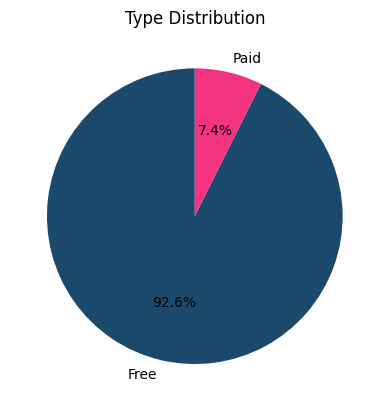

In [ ]:
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#1a496c','#f3337f'])
plt.title('Type Distribution')

from the pie chart above, we can see that over 92% of users prefer free services

Another task is to analyse the free and paid services over the years. what is needed here is to comprehend the number of free app versus the number of paid app downloaded over the years

In [ ]:
free_df = data[data['Type']=='Free']
free_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,year_added,month_added
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,2018,1
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,2018,8
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,2018,6
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,2018,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,2017-07-25,1.48,4.1 and up,2017,7
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,2018-07-06,1.0,4.1 and up,2018,7
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,2017-01-20,1.0,2.2 and up,2017,1
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device,2015,1


In [ ]:
paid_df = data[data["Type"] == "Paid"]
paid_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,year_added,month_added
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,"100,000+",Paid,$4.99,Everyone,Business,2018-03-25,1.5.2,4.0 and up,2018,3
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,"100,000+",Paid,$4.99,Everyone,Business,2017-04-11,3.4.6,3.0 and up,2017,4
290,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,"100,000+",Paid,$4.99,Everyone,Business,2018-03-25,1.5.2,4.0 and up,2018,3
291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,"100,000+",Paid,$4.99,Everyone,Business,2017-04-11,3.4.6,3.0 and up,2017,4
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,Varies with device,"100,000+",Paid,$3.99,Everyone,Communication,2018-07-05,7.5.3.20547,4.1 and up,2018,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10735,FP VoiceBot,FAMILY,NaN,17,157k,100+,Paid,$0.99,Mature 17+,Entertainment,2015-11-25,1.2,2.1 and up,2015,11
10760,Fast Tract Diet,HEALTH_AND_FITNESS,4.4,35,2.4M,"1,000+",Paid,$7.99,Everyone,Health & Fitness,2018-08-08,1.9.3,4.2 and up,2018,8
10782,Trine 2: Complete Story,GAME,3.8,252,11M,"10,000+",Paid,$16.99,Teen,Action,2015-02-27,2.22,5.0 and up,2015,2
10785,"sugar, sugar",FAMILY,4.2,1405,9.5M,"10,000+",Paid,$1.20,Everyone,Puzzle,2018-06-05,2.7,2.3 and up,2018,6


In [ ]:
free = free_df["year_added"].value_counts()
free

,count
year_added,
2018,7004
2017,1684
2016,710
2015,377
2014,150
2013,81
2012,21
2011,12
2010,1


the result after executing "free_df['year_added'].value_counts()" command is in series. To convert the resulting Series into a DataFrame and properly structure the data with column names I have to reset the index and convert it to dataframe allowing the counts and the years to be manipulated as seperate columns.

In [ ]:
free = free_df["year_added"].value_counts().reset_index()
free

,year_added,count
0,2018,7004
1,2017,1684
2,2016,710
3,2015,377
4,2014,150
5,2013,81
6,2012,21
7,2011,12
8,2010,1


In [ ]:
free.columns=['year','count']
free

,year,count
0,2018,7004
1,2017,1684
2,2016,710
3,2015,377
4,2014,150
5,2013,81
6,2012,21
7,2011,12
8,2010,1


In [ ]:
paid_2 = paid_df["year_added"].value_counts().reset_index()
paid_2

,year_added,count
0,2018,345
1,2017,183
2,2016,94
3,2015,82
4,2014,59
5,2013,29
6,2012,5
7,2011,3


In [ ]:
paid_2.columns=['year','count']
paid_2

,year,count
0,2018,345
1,2017,183
2,2016,94
3,2015,82
4,2014,59
5,2013,29
6,2012,5
7,2011,3


comparing the resulting free and paid dataframes, the free has 8 rows while the paid has only 7. looking closely, it is obvious 2010 row is missing in the paid.

to resolve this, we create a new data dictionary for paid and append the value 0 for count to complete 8 rows.

In [ ]:
#create a data dictionary
row = {"year": 2010, "count": 0}

In [ ]:
paid_3 = paid_2
paid_3

,year,count
0,2018,345
1,2017,183
2,2016,94
3,2015,82
4,2014,59
5,2013,29
6,2012,5
7,2011,3


 Check if the row exists in the DataFrame before appending a new row
     if not (paid_3 == row).all(axis=1).any():  #
     This checks if `row` exists in the DataFrame

# Convert `row` to a DataFrame if it's not already (assuming `row` is a dictionary or series)
    row_df = pd.DataFrame([row])

# Use pd.concat to append the row to the existing DataFrame
    paid_3 = pd.concat([paid_3, row_df], ignore_index=True)
paid_3

In [ ]:
# Check if the row exists in the DataFrame before appending a new row
if not (paid_3 == row).all(axis=1).any():  # This checks if `row` exists in the DataFrame

# Convert `row` to a DataFrame if it's not already (assuming `row` is a dictionary or series)
    row_df = pd.DataFrame([row])

# Use pd.concat to append the row to the existing DataFrame
    paid_3 = pd.concat([paid_3, row_df], ignore_index=True)
paid_3

,year,count
0,2018,345
1,2017,183
2,2016,94
3,2015,82
4,2014,59
5,2013,29
6,2012,5
7,2011,3
8,2010,0


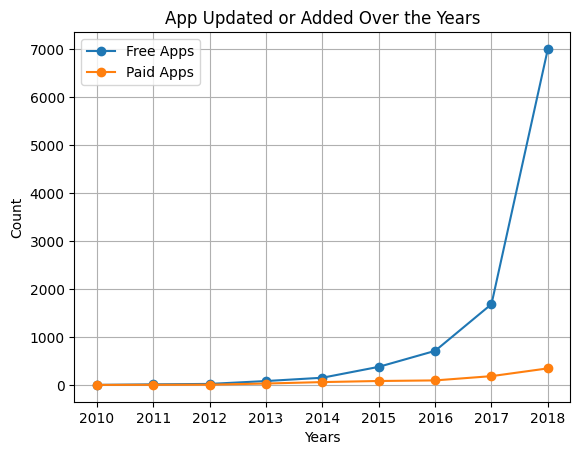

In [ ]:
free_year = free['year']        # 'free' is a DataFrame with 'year' and 'count' columns
free_count = free['count']      # 'free' is also a DataFrame with 'year' and 'count' columns

paid_year = paid_3['year']
paid_count = paid_3['count']

# Create the line plot
plt.plot(free_year, free_count, label='Free Apps', marker='o')
plt.plot(paid_year, paid_count, label='Paid Apps', marker='o')

# Define layout with titles and labels
plt.title('App Updated or Added Over the Years')
plt.xlabel('Years')
plt.ylabel('Count')

# Display the legend
plt.legend()

# Display the chart
plt.grid()
#plt.show()

Next is to explore more about the free and paid App categories. What month are free apps and paid apps uploaded the most

In [ ]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,year_added,month_added
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,2018,1
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,2018,8
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,2018,6
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,2018,6


In [ ]:
free

,year,count
0,2018,7004
1,2017,1684
2,2016,710
3,2015,377
4,2014,150
5,2013,81
6,2012,21
7,2011,12
8,2010,1


In [ ]:
free_months = free_df["month_added"].value_counts()
free_months

,count
month_added,
7,3022
8,1511
6,1179
5,897
3,595
4,553
2,489
1,444
12,363


In [ ]:
free_months = free_df["month_added"].value_counts().reset_index()
free_months

,month_added,count
0,7,3022
1,8,1511
2,6,1179
3,5,897
4,3,595
5,4,553
6,2,489
7,1,444
8,12,363
9,10,357


In [ ]:
free_months.columns=['month','count']
free_months

,month,count
0,7,3022
1,8,1511
2,6,1179
3,5,897
4,3,595
5,4,553
6,2,489
7,1,444
8,12,363
9,10,357


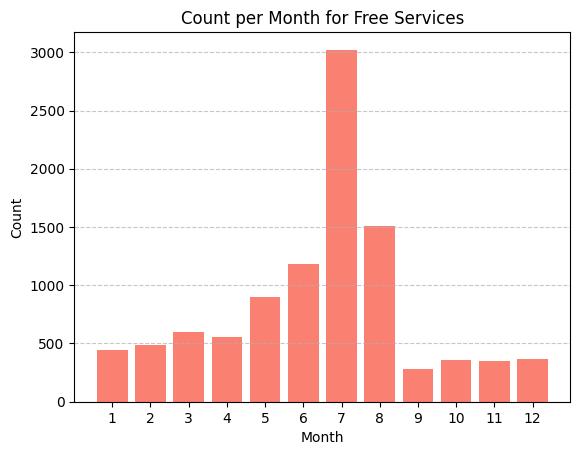

In [ ]:
months = free_months['month']
counts = free_months['count']

# Create the bar chart
plt.bar(months, counts, color='salmon')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Count per Month for Free Services')

# Set x-ticks to show months clearly
plt.xticks(months)

# Optional: Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the chart
plt.show()

In [ ]:
paid_3

,year,count
0,2018,345
1,2017,183
2,2016,94
3,2015,82
4,2014,59
5,2013,29
6,2012,5
7,2011,3
8,2010,0


In [ ]:
paid_months = paid_df["month_added"].value_counts()
paid_months

,count
month_added,
7,141
6,93
8,83
5,81
3,72
4,63
12,63
1,47
2,45


In [ ]:
paid_months = paid_df["month_added"].value_counts().reset_index()
paid_months

,month_added,count
0,7,141
1,6,93
2,8,83
3,5,81
4,3,72
5,4,63
6,12,63
7,1,47
8,2,45
9,10,41


In [ ]:
paid_months.columns=['month','count']
paid_months

,month,count
0,7,141
1,6,93
2,8,83
3,5,81
4,3,72
5,4,63
6,12,63
7,1,47
8,2,45
9,10,41


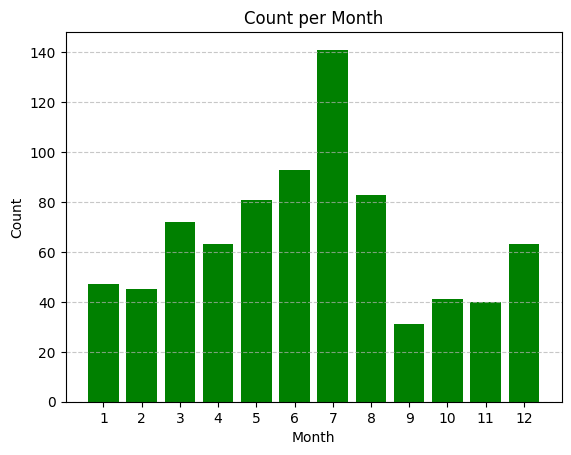

In [ ]:
# Sample data (replace with your actual DataFrame)
months = [7, 6, 8, 5, 3, 4, 12, 1, 2, 10, 11, 9]  # Replace with your DataFrame column: data['month']
counts = [141, 93, 83, 81, 72, 63, 63, 47, 45, 41, 40, 31]  # Replace with your DataFrame column: data['count']

# Create the bar chart
plt.bar(months, counts, color='green')

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Count per Month')

# Display the chart
plt.xticks(months)  # Set x-ticks to match the months
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Optional: Add grid lines for better readability
plt.show()

Time to learn about the features characteristics of the dataset

In [ ]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'year_added', 'month_added'],
      dtype='object')

In [ ]:
data.dtypes

,0
App,object
Category,object
Rating,object
Reviews,object
Size,object
Installs,object
Type,object
Price,object
Content Rating,object
Genres,object


**"Price" data cleaning**

In [ ]:
# To view the datatype of the price column
data["Price"].dtype

dtype('O')

The price datatype should be in numerical type, so let's convert to float
      
      data["Price"].astype(float)
Error was because it could not convert string to float. It would be ideal to view the unique values of price to have an idea of what the values look like

In [ ]:
data['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

Observation shows the values are enclosed in a single quote confirming the values belong to object datatype. This means the price column is not yet suitable for the analysis so we have to clean it and make it fit. To begin, what is preventing the "Price" from converting to float is the dollar sign in each price value and There has to be a way to eliminate them. The unique values show the dollar sign is not applied to rows where price are '0'

In [ ]:
#To view all rows with value of '0'
data[data['Price'] == '0']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,year_added,month_added
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,2018,1
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,2018,8
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,2018,6
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,2018,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,2017-07-25,1.48,4.1 and up,2017,7
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,2018-07-06,1.0,4.1 and up,2018,7
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,2017-01-20,1.0,2.2 and up,2017,1
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device,2015,1


In [ ]:
# picking any random price value
data[data['Price'] == '$4.99']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,year_added,month_added
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,"100,000+",Paid,$4.99,Everyone,Business,2018-03-25,1.5.2,4.0 and up,2018,3
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,"100,000+",Paid,$4.99,Everyone,Business,2017-04-11,3.4.6,3.0 and up,2017,4
290,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,"100,000+",Paid,$4.99,Everyone,Business,2018-03-25,1.5.2,4.0 and up,2018,3
291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,"100,000+",Paid,$4.99,Everyone,Business,2017-04-11,3.4.6,3.0 and up,2017,4
995,My Talking Pet,ENTERTAINMENT,4.6,6238,Varies with device,"100,000+",Paid,$4.99,Everyone,Entertainment,2018-06-30,Varies with device,Varies with device,2018,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10046,Advanced EX for MITSUBISHI,TOOLS,2.9,33,141k,"1,000+",Paid,$4.99,Everyone,Tools,2015-08-21,1.1,1.6 and up,2015,8
10047,Advanced EX for KIA,TOOLS,3.3,257,160k,"5,000+",Paid,$4.99,Everyone,Tools,2015-03-14,1.4,1.6 and up,2015,3
10050,Advanced EX for NISSAN,TOOLS,2.9,164,144k,"5,000+",Paid,$4.99,Everyone,Tools,2015-03-14,1.3,1.6 and up,2015,3
10051,Advanced EX for FIAT,TOOLS,3.5,138,141k,"5,000+",Paid,$4.99,Everyone,Tools,2015-03-05,1.6,1.6 and up,2015,3


In [ ]:
data['Price'][234]

'$4.99'

 The aim here is to display the price value starting after the dollar sign

In [ ]:
# Asking Python to display the value of x starting from the first index while excluding the zero index
x = '$4.99'
x =  float(x[1:])
x

4.99

In [ ]:
# Using a function to eliminate the dollar sign from the rest of the values. Remember a random value was chosen previously
def dollar_eliminate(x):
  if x == '0':
    return 0
  else:
    return x[1:]

In [ ]:
data['Price'][0]

'0'

In [ ]:
type(data['Price'][0])

str

In [ ]:
# confirm the functions works
type(dollar_eliminate(data['Price'][0]))

int

In [ ]:
data_copy = data.copy()

In [ ]:
# Calling the function on the data copy
data_copy['Price'] = data_copy['Price'].apply(dollar_eliminate)
data_copy['Price'].unique()

array([0, '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99', '3.49',
       '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00', '24.99',
       '11.99', '79.99', '16.99', '14.99', '1.00', '29.99', '12.99',
       '2.49', '10.99', '1.50', '19.99', '15.99', '33.99', '74.99',
       '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88', '25.99',
       '399.99', '17.99', '400.00', '3.02', '1.76', '4.84', '4.77',
       '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99', '299.99',
       '379.99', '37.99', '18.99', '389.99', '19.90', '8.49', '1.75',
       '14.00', '4.85', '46.99', '109.99', '154.99', '3.08', '2.59',
       '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04', '4.29',
       '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97', '200.00',
       '89.99', '2.56', '30.99', '3.61', '394.99', '1.26', '1.20', '1.04'],
      dtype=object)

In [ ]:
# Converting the entire value to float and displaying the data_copy shows the entire price value is now of float64 data type.
data_copy['Price'] = data_copy['Price'].astype(float)
data_copy['Price'].dtype

dtype('float64')

In [ ]:
# Clean the "Rating" column

data_copy['Rating'].dtype

dtype('O')

In [ ]:
data_copy['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4.0, nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5.0, 2.6, 3.0, 1.9, 2.5, 2.8,
       2.7, 1.0, 2.9, 2.3, 2.2, 1.7, 2.0, 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2, '1.9'], dtype=object)

In [ ]:
# To be sure of how many rating has value as '1.9'
data[data['Rating'] == '1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,year_added,month_added
10472,Life Made WI-Fi Touchscreen Photo Frame,None,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,2018-02-11,1.0.19,4.0 and up,2018,2


In [ ]:
data_copy['Rating'].dtype

dtype('O')

In [ ]:
type(data_copy['Rating'][10472])

str

In [ ]:
#data_copy['Rating'].astype(float)
data_copy['Rating'].replace('1.9', 1.9, inplace=True)

<ipython-input-61-65a239e99599>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_copy['Rating'].replace('1.9', 1.9, inplace=True)
<ipython-input-61-65a239e99599>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_copy['Rating'].replace('1.9', 1.9, inplace=True)


In [ ]:
data_copy['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8,
       2.7, 1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2])

In [ ]:
data_copy['Rating'].dtype

dtype('float64')

Clean the "Reviews" column

In [ ]:
data_copy['Reviews'].dtype

dtype('O')

In [ ]:
def convert_to_float(feature, df):
  print('data type of {} was {} before manipulation'.format(feature, df[feature].dtype))
  df[feature] = df[feature].astype(float)
  print('data type of {} is {} after manipulation'.format(feature, df[feature].dtype))

In [ ]:
convert_to_float('Reviews', data_copy)

data type of Reviews was object before manipulation
data type of Reviews is float64 after manipulation


**Data cleaning for the "Installs"**

In [ ]:
data_copy['Installs']

,Installs
0,"10,000+"
1,"500,000+"
2,"5,000,000+"
3,"50,000,000+"
4,"100,000+"
...,...
10836,"5,000+"
10837,100+
10838,"1,000+"
10839,"1,000+"


In [ ]:
data_copy['Installs'].dtype

dtype('O')

In [ ]:
type(data_copy['Installs'][0])

str

In [ ]:
data_copy['Installs'][0]

'10,000+'

In [ ]:
y = data_copy['Installs'][1].replace(',', '').replace('+', '')
y

'500000'

In [ ]:
int(y)

500000

**Define a function to apply on all other "Installs" values**

In [ ]:
# Remove commas and the plus sign using replace() method
def remove_commas_and_plus(y):
  y = y.replace(",", "").replace("+", "")
  return int(y)

In [ ]:
data_copy['Installs'] = data_copy['Installs'].apply(remove_commas_and_plus)

In [ ]:
data_copy['Installs'].dtype

dtype('int64')

In [ ]:
#To confirm the data cleaning on "Installs"
data_copy['Installs'][12]

10000000

Alternative code for eliminating special characters from the Installs column value

Using replace() method to remove commas and plus sign

    eliminate_comma_sign2 = y.replace(",", "").replace("+", "")
Print the cleaned string
    
    print(eliminate_comma_sign2)

Remove the commas and the plus sign by string slicing (taking only the number parts)  

    cleaned_string = string[:-1].replace(",", "")
    print(cleaned_string)

"Size" Feature Cleaning
the following are what will be looked out for in the "Size" feature. these are the possible issues commonly encountered with application size.

App unit inconsistency -App sizes might be listed in different units (e.g., MB, GB, KB).
irregular App version
Data type inconsistency

In [ ]:
data_copy['Size'].dtype

dtype('O')

In [ ]:
# To view the examine the size
#data_copy['Size'].unique()

In [ ]:
# To check the number of each of the applications
data_copy['Size'].value_counts()

,count
Size,
Varies with device,1694
11M,198
12M,196
14M,194
13M,191
...,...
430k,1
429k,1
200k,1


In [ ]:
data_copy['Size']

,Size
0,19M
1,14M
2,8.7M
3,25M
4,2.8M
...,...
10836,53M
10837,3.6M
10838,9.5M
10839,Varies with device


In [ ]:
float(data_copy['Size'][0][0:-1])

19.0

Dealing with App unit inconsistency firstly, the data has different units the solution is to standardise sizes to Megabyte (MB). which means all data in kilobyte (KB) will be converted to MB. Note: 1MB = 1024

In [ ]:
def convert_to_mb(x1):
  if 'M' in x1:
    return float(x1[0:-1])
  else:
    mb = float(x1[0:-1])/1024
    mb = np.round(mb, 2)
    return mb

In [ ]:
convert_to_mb('460k')

0.45

In [ ]:
#data_copy['Size'].apply(convert_to_mb)

In [ ]:
# View the value where "Size" == 'Varies with device'
data_filter = data_copy['Size'] == 'Varies with device'
data1 = data_copy[~data_filter]

In [ ]:
data1['Size']

,Size
0,19M
1,14M
2,8.7M
3,25M
4,2.8M
...,...
10835,9.6M
10836,53M
10837,3.6M
10838,9.5M


In [ ]:
data1['Size'] = data1['Size'].apply(convert_to_mb)

<ipython-input-87-870646af60b3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Size'] = data1['Size'].apply(convert_to_mb)


In [ ]:
data1['Size'].dtype

dtype('float64')

In [ ]:
data1['Size'].median()

13.0

In [ ]:
data_copy['Size'].replace('Varies with device', '13M', inplace = True)

In [ ]:
data_copy['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', '13M', '9.4M', '15M', '10M', '1.2M', '26M',
       '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M',
       '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M', '8.9M', '3.9M',
       '2.9M', '38M', '32M', '5.4M', '18M', '1.1M', '2.2M', '4.5M',
       '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M', '7.1M', '3.7M',
       '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M', '4.9M', '9.5M',
       '5.0M', '5.9M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '7.2M',
       '2.1M', '42M', '7.3M', '9.1M', '55M', '23k', '6.5M', '1.5M',
       '7.5M', '51M', '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M',
       '3.3M', '40M', '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k',
       '8.4M', '118k', '44M', '695k', '1.6M', '6.2M', '18k', '53M',
     

In [ ]:
data_copy['Size'] = data_copy['Size'].apply(convert_to_mb)

In [ ]:
data_copy['Size'].dtype

dtype('float64')

Feature selection using SelectKBest method to select the top significant features among all available features

Use **SelectKBest** method to choses the top 'k' features based on statistical tests. It evaluates the importance of each feature relative to the target variable (Ratings) and picks the best ones according to the selected scoring function.

In [ ]:
# Firsly check for missing values
data_copy.isna().sum()

,0
App,0
Category,1
Rating,1473
Reviews,0
Size,0
Installs,0
Type,0
Price,0
Content Rating,0
Genres,1


In [ ]:
# Drop missing values If there are missing values
feature = data_copy.dropna()

In [ ]:
independent_variables = ['Reviews', 'Size', 'Installs', 'Price']

In [ ]:
x2 = feature[independent_variables]

In [ ]:
y = feature['Rating']

In [ ]:
x2.shape, y.shape

((9360, 4), (9360,))

In [ ]:
# selecting the best features for algorithm
from sklearn.feature_selection import SelectKBest, f_regression

In [ ]:
#initialising SelectKBest
x_new = SelectKBest(f_regression, k=3).fit_transform(x2, y)
x_new

array([[1.59000e+02, 1.90000e+01, 1.00000e+04],
       [9.67000e+02, 1.40000e+01, 5.00000e+05],
       [8.75100e+04, 8.70000e+00, 5.00000e+06],
       ...,
       [4.00000e+00, 3.60000e+00, 1.00000e+02],
       [1.14000e+02, 1.30000e+01, 1.00000e+03],
       [3.98307e+05, 1.90000e+01, 1.00000e+07]])

In [ ]:
x2.head()

,Reviews,Size,Installs,Price
0,159.0,19.0,10000,0.0
1,967.0,14.0,500000,0.0
2,87510.0,8.7,5000000,0.0
3,215644.0,25.0,50000000,0.0
4,967.0,2.8,100000,0.0


In [ ]:
x_new[0:5]

array([[1.59000e+02, 1.90000e+01, 1.00000e+04],
       [9.67000e+02, 1.40000e+01, 5.00000e+05],
       [8.75100e+04, 8.70000e+00, 5.00000e+06],
       [2.15644e+05, 2.50000e+01, 5.00000e+07],
       [9.67000e+02, 2.80000e+00, 1.00000e+05]])

In [ ]:
from scipy.stats import pearsonr
from scipy import stats

In [ ]:
pearsonr(feature['Reviews'], feature['Rating'])

PearsonRResult(statistic=0.06813270883720693, pvalue=4.155367872151512e-11)

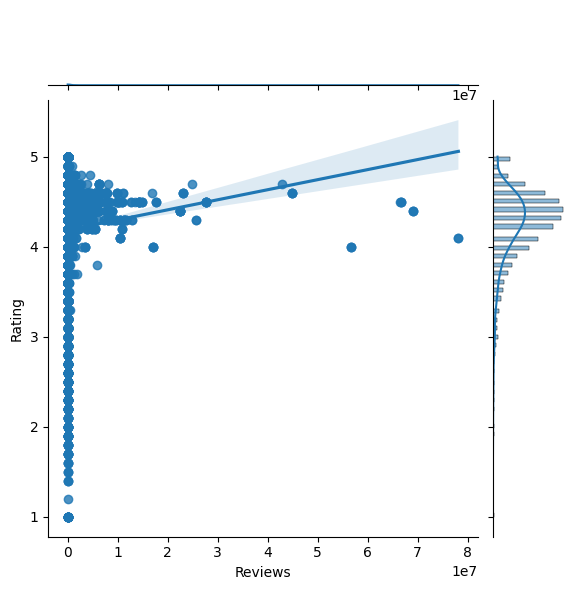

In [ ]:
j = sns.jointplot(x='Reviews', y='Rating', data=feature, kind='reg')

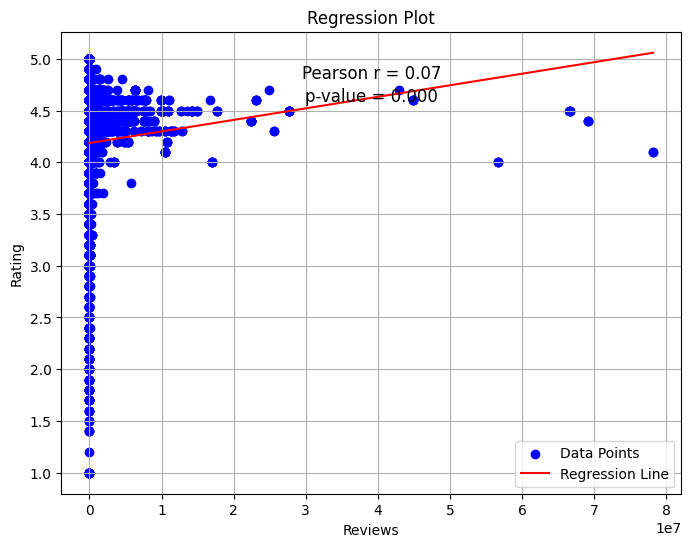

In [ ]:
# ploting with matplotlib
# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(feature['Reviews'], feature['Rating'])

# Create a range of x values for the regression line
x_values = np.linspace(feature['Reviews'].min(), feature['Reviews'].max(), 100)
y_values = slope * x_values + intercept

# Create the plot
plt.figure(figsize=(8, 6))
plt.scatter(feature['Reviews'], feature['Rating'], color='blue', label='Data Points')
plt.plot(x_values, y_values, color='red', label='Regression Line')

# Annotate Pearson r and p-value
plt.text(0.5, 0.9, f'Pearson r = {r_value:.2f}', ha='center', transform=plt.gca().transAxes, fontsize=12)
plt.text(0.5, 0.85, f'p-value = {p_value:.3f}', ha='center', transform=plt.gca().transAxes, fontsize=12)

plt.title('Regression Plot')
plt.xlabel('Reviews')
plt.ylabel('Rating')
plt.legend()
plt.grid()
plt.show()

In [ ]:
#selecting most significant without algorithm and how SelectKBest Work undergroung
out_list = []
for column in independent_variables:
  corr_list = pearsonr(feature[column], feature['Rating'])
  out_list.append([column,corr_list[0], corr_list[1]])

out_list

[['Reviews', 0.06813270883720693, 4.155367872151512e-11],
 ['Size', 0.0658546690026706, 1.8021360380053946e-10],
 ['Installs', 0.051336927091569104, 6.719094655643055e-07],
 ['Price', -0.02191949833499109, 0.03395385444635707]]

In [ ]:
# Create DataFrame with 3 columns
cor_df = pd.DataFrame(out_list, columns=['Features', 'Corelation', 'P-value'])
cor_df

,Features,Corelation,P-value
0,Reviews,0.068133,4.155368e-11
1,Size,0.065855,1.802136e-10
2,Installs,0.051337,6.719095e-07
3,Price,-0.021919,3.395385e-02


In [ ]:
# lets sort by p-value
sort_df = cor_df.sort_values(by=['P-value'])
sort_df
#sort_df.sort_values(by=['P-value'])

,Features,Corelation,P-value
0,Reviews,0.068133,4.155368e-11
1,Size,0.065855,1.802136e-10
2,Installs,0.051337,6.719095e-07
3,Price,-0.021919,3.395385e-02


In [ ]:
#Next is to drop the price column
data_copy.drop('Price', axis=1, inplace=True)

In [ ]:
# Select only numerical columns (e.g., Rating, Reviews)
numeric_data = data_copy.select_dtypes(include=['float64', 'int64'])

In [ ]:
numeric_data.corr()

,Rating,Reviews,Size,Installs
Rating,1.000000,0.068147,0.066286,0.051393
Reviews,0.068147,1.000000,0.104032,0.643122
Size,0.066286,0.104032,1.000000,0.047699
Installs,0.051393,0.643122,0.047699,1.000000


 Select only numerical columns (e.g., Rating, Reviews)
    
    numeric_data = data_copy.select_dtypes(include=['float64', 'int64'])

In [ ]:
# Select only the numeric columns, including the new 'date_added_numeric' and 'month_added'
numeric_data = data_copy[['Rating', 'Reviews', 'Size', 'year_added', 'month_added']]

In [ ]:
numeric_data.corr()

,Rating,Reviews,Size,year_added,month_added
Rating,1.000000,0.068147,0.066286,0.137317,0.018075
Reviews,0.068147,1.000000,0.104032,0.075537,0.045946
Size,0.066286,0.104032,1.000000,0.181947,0.028715
year_added,0.137317,0.075537,0.181947,1.000000,-0.187359
month_added,0.018075,0.045946,0.028715,-0.187359,1.000000


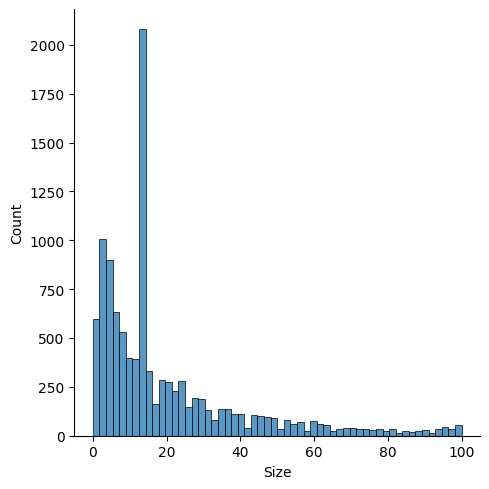

In [ ]:
#To check for outliers in the price data
sns.displot(numeric_data['Size'])

Function Definition to Remove Outliers
Outliers can significantly affect the accuracy of an algorithm. Therefore, eliminating them is an instrumental step in data preprocessing. Below is a Python function that removes outliers using the Interquartile Range (IQR) technique:

In [ ]:
# This function eliminates outliers from a given column in a DataFrame
def remove_outliers_sd(df, feature):
  df_out = pd.DataFrame()
  for key, subdf in df.groupby('Type'):
    m = np.mean(subdf[feature])
    sd = np.std(subdf[feature])
    reduced_df = subdf[(subdf[feature] > (m - sd)) & (subdf[feature] <= (m + sd))]

    df_out = pd.concat([df_out, reduced_df], ignore_index=True)
  return df_out

In [ ]:
# Applying the remove_outliers_sd on size
remove_outliers_sd(data_copy, 'Size')

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver,year_added,month_added
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.00,10000,Free,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,2018,1
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.00,500000,Free,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.70,5000000,Free,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,2018,8
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.00,50000000,Free,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,2018,6
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.80,100000,Free,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,2018,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9315,FP VoiceBot,FAMILY,NaN,17.0,0.15,100,Paid,Mature 17+,Entertainment,2015-11-25,1.2,2.1 and up,2015,11
9316,Fast Tract Diet,HEALTH_AND_FITNESS,4.4,35.0,2.40,1000,Paid,Everyone,Health & Fitness,2018-08-08,1.9.3,4.2 and up,2018,8
9317,Trine 2: Complete Story,GAME,3.8,252.0,11.00,10000,Paid,Teen,Action,2015-02-27,2.22,5.0 and up,2015,2
9318,"sugar, sugar",FAMILY,4.2,1405.0,9.50,10000,Paid,Everyone,Puzzle,2018-06-05,2.7,2.3 and up,2018,6


In [ ]:
data_copy.shape

(10840, 14)

The following code removes outliers from the 'Size' column of the data_copy dataset, using the standard deviation method. Any values in the 'Size' column that deviate significantly from the mean will be considered outliers and removed.

In [ ]:
op = remove_outliers_sd(data_copy, 'Size')

In [ ]:
op.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver,year_added,month_added
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000,Free,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,2018,1
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000,Free,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000,Free,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,2018,8


<ipython-input-122-d973f5bce320>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(op['Size'])


<Axes: xlabel='Size', ylabel='Density'>

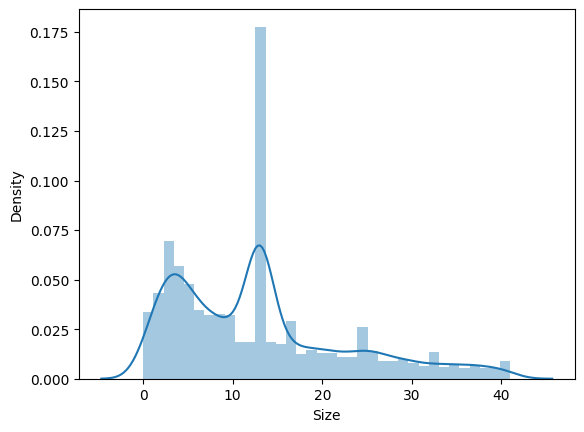

In [ ]:
sns.distplot(op['Size'])

<ipython-input-123-c454029c12f1>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(op['Installs'])


<Axes: xlabel='Installs', ylabel='Density'>

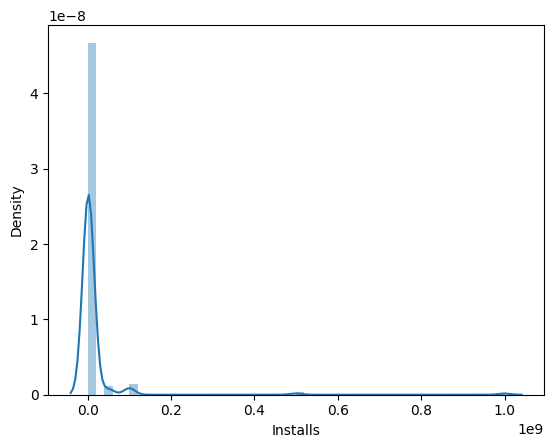

In [ ]:
# Checking for outliers in "Install"
sns.distplot(op['Installs'])

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='Installs'>

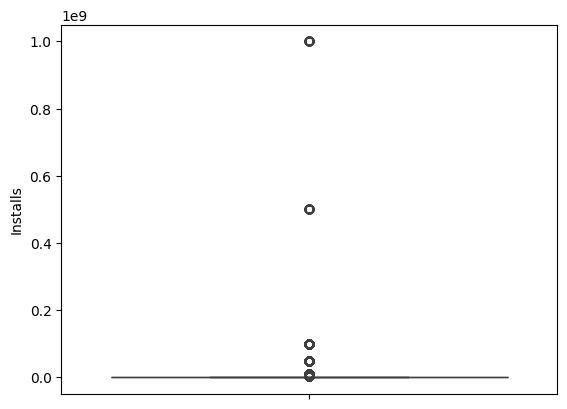

In [ ]:
# Boxplot
sns.boxplot(op['Installs'])

The following code is used to calculate the Interquartile Range (IQR) for 'Installs' column op dataframe.

Q1 (25th percentile): The value below which 25% of the data falls. Q3 (75th percentile): The value below which 75% of the data falls. IQR (Interquartile Range): The difference between Q3 and Q1, representing the range within which the central 50% of the data lies. It's often used to identify outliers by looking for values that fall outside of Q1 - 1.5 * IQR or Q3 + 1.5 * IQR.

In [ ]:
# to remove outliers from the "Install" column using the Interquartile Range (IQR) method
q1 = op['Installs'].quantile(0.25)
q3 = op['Installs'].quantile(0.75)
iqr = q3 - q1
iqr

999000.0

To calculate the boundaries for detecting outliers based on the Interquartile Range (IQR) method

lower_tail sets the minimum value below which data points are considered outliers. upper_tail sets the maximum value above which data points are considered outliers.

In [ ]:
lower_tail = q1 - 1.5 * iqr
upper_tail = q3 + 1.5 * iqr
lower_tail, upper_tail

(-1497500.0, 2498500.0)

To identify outliers in the 'Installs' column of the DataFrame op based on the lower tail and upper tail boundaries calculated earlier.

The code checks each value in the 'Installs' column. If a value is greater than the upper boundary or less than the lower boundary, it is identified as an outlier and added to the outliers list. Values that fall within the range defined by the lower tail and upper tail are ignored.

Example: Suppose you have this data in the 'Installs' column: [100, 200, 300, 5000, 10], and the lower_tail is 50, while the upper_tail is 1000. Here’s how the code works:

100 is not an outlier (since 50 ≤ 100 ≤ 1000), so it is ignored. 200 is not an outlier, so it is ignored. 300 is not an outlier, so it is ignored. 5000 is an outlier (since it’s greater than upper_tail), so it is added to the outliers list. 10 is an outlier (since it’s less than lower_tail), so it is added to the outliers list. In this case, the outliers list would contain [5000, 10].

In [ ]:
outliers =[]
for x in op['Installs']:
  if x > upper_tail or x < lower_tail:
    outliers.append(x)
  else:
      pass

In [ ]:
len(outliers)

2207

In [ ]:
print(outliers)

[5000000, 50000000, 10000000, 5000000, 10000000, 5000000, 10000000, 10000000, 5000000, 5000000, 5000000, 10000000, 10000000, 100000000, 10000000, 100000000, 10000000, 10000000, 10000000, 10000000, 1000000000, 5000000, 10000000, 10000000, 5000000, 5000000, 5000000, 10000000, 10000000, 10000000, 10000000, 50000000, 10000000, 5000000, 50000000, 5000000, 100000000, 10000000, 5000000, 50000000, 10000000, 10000000, 5000000, 5000000, 5000000, 10000000, 5000000, 5000000, 10000000, 5000000, 50000000, 5000000, 5000000, 10000000, 10000000, 10000000, 5000000, 5000000, 5000000, 10000000, 10000000, 5000000, 10000000, 10000000, 5000000, 5000000, 5000000, 5000000, 10000000, 10000000, 50000000, 100000000, 5000000, 10000000, 5000000, 5000000, 5000000, 1000000000, 1000000000, 10000000, 1000000000, 100000000, 1000000000, 1000000000, 500000000, 5000000, 100000000, 100000000, 100000000, 500000000, 50000000, 5000000, 5000000, 100000000, 10000000, 10000000, 10000000, 10000000, 100000000, 10000000, 5000000, 10

To identify outliers in the 'Installs' column of the DataFrame op and substitute their values with the median value of the entire 'Installs' column.

The median ensures that replacing outliers doesn’t distort the distribution to an extent. This technique may suppress the impact of outliers on statistical analyses, especially on models that are more susceptible to extreme values.

In [ ]:
# To find the median of the outliers on "Installs"
for x in op['Installs']:
  if x > upper_tail or x < lower_tail:
    op['Installs'] = op['Installs'].replace(x, np.median(op['Installs']))
  else:
      pass

<ipython-input-131-04c09ce3cad5>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(op['Installs'])


<Axes: xlabel='Installs', ylabel='Density'>

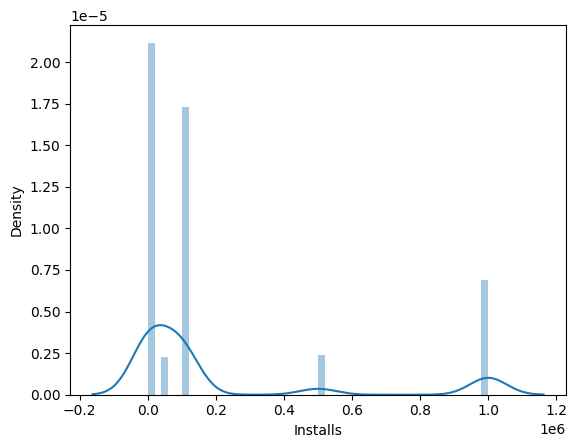

In [ ]:
sns.distplot(op['Installs'])

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='Installs'>

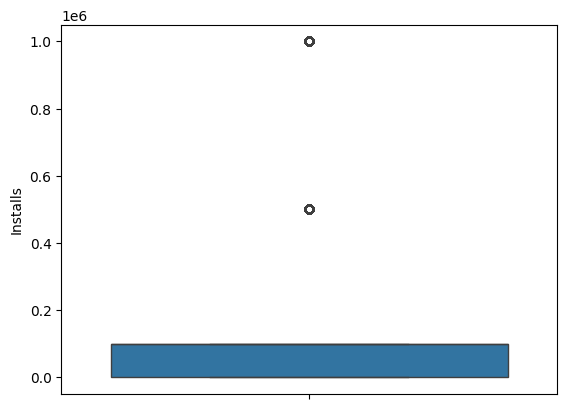

In [ ]:
# Also
sns.boxplot(op['Installs'])

In [ ]:
op2 = op.copy()

<ipython-input-134-0291ce9d286c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(op2['Reviews'])


<Axes: xlabel='Reviews', ylabel='Density'>

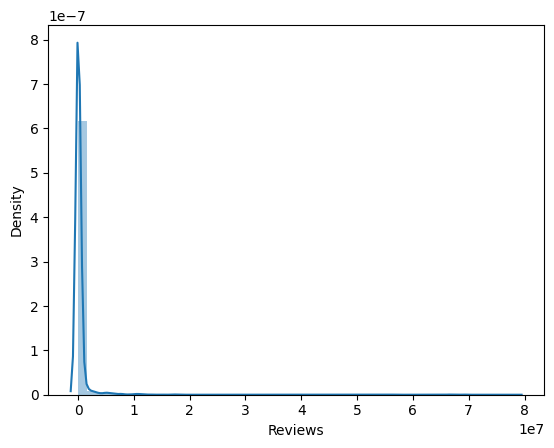

In [ ]:
# Review feature
sns.distplot(op2['Reviews'])

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='Reviews'>

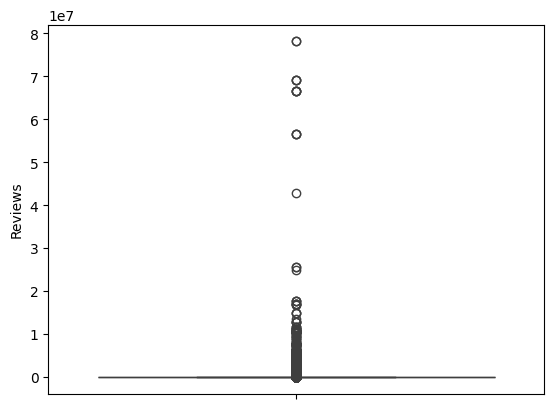

In [ ]:
# Also boxplot
sns.boxplot(op2['Reviews'])

In [ ]:
op2['Reviews'].max()

78158306.0

In [ ]:
op2['Reviews'].median()

1192.0

In [ ]:
op2['Reviews'].quantile(0.75)

38958.0

In [ ]:
op2['Reviews'].mean()

349258.57628755365

In [ ]:
threshold = 1e7

In [ ]:
op2[op2['Reviews'] > threshold].shape

(58, 14)

In [ ]:
op2['Reviews'] = np.where(op2['Reviews'] > threshold, op2['Reviews'].median(), op2['Reviews'])

In [ ]:
op2['Reviews'].median()

1190.5

In [ ]:
op2['Reviews'].mean()

193907.85922746782

Choosing between mean, median, and other measures of central tendency depends on the nature of the data and the specific analysis goals.

when to use Mean
if The data has normal distribution (bell-shaped). There are no extreme outliers or You want to use a measure that incorporates all data points.

Median If there’s an even number of observations, it’s the average of the two middle values. Use When The data is either positively or negatively distorted, when There are outliers that could distort the mean or You want a measure that represents the central point of the data, less affected by extreme values.

Mode is Used When The data is categorical or discrete, where you are interested in the most common category or value.

You want to understand the frequency of occurrences.

<ipython-input-145-b4592fe4e5ee>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(op2['Reviews'])


<Axes: xlabel='Reviews', ylabel='Density'>

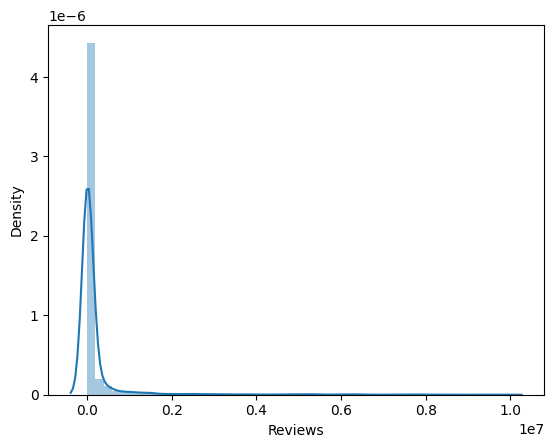

In [ ]:
sns.distplot(op2['Reviews'])

In [ ]:
# Applying log
op2['Reviews'] = np.log1p(op2['Reviews'])

<ipython-input-147-b4592fe4e5ee>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(op2['Reviews'])


<Axes: xlabel='Reviews', ylabel='Density'>

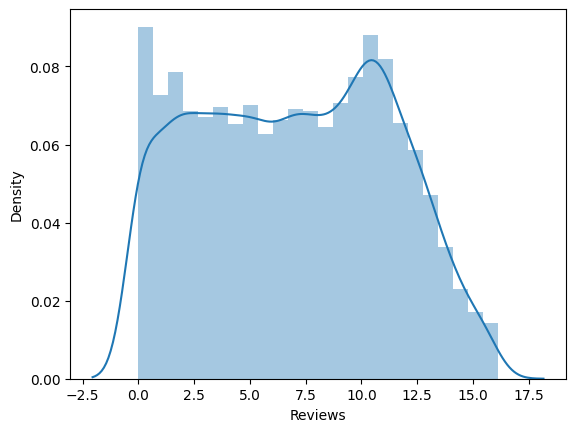

In [ ]:
sns.distplot(op2['Reviews'])

From the plot above, the Review data is now more balanced

Imputing Missing values

In [ ]:
# Identifying the missing values in the rating column
op2['Rating'].isna().sum()

1396

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='Content Rating', ylabel='Rating'>

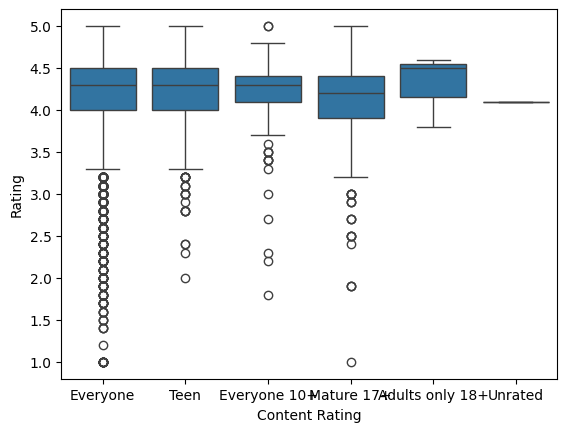

In [ ]:
sns.boxplot(x = 'Content Rating', y = 'Rating', data = op2)

In [ ]:
op2.groupby('Content Rating')['Rating'].median()

,Rating
Content Rating,
Adults only 18+,4.5
Everyone,4.3
Everyone 10+,4.3
Mature 17+,4.2
Teen,4.3
Unrated,4.1


In [ ]:
op2.groupby('Content Rating')['Rating'].mean()

,Rating
Content Rating,
Adults only 18+,4.300000
Everyone,4.178822
Everyone 10+,4.213910
Mature 17+,4.103448
Teen,4.212376
Unrated,4.100000


In [ ]:
def impute_Rating(cols):
    """
    Function to impute (fill) missing values in the 'Rating' column based on the 'Content_rating' column.

    Args:
        cols: List containing two elements:
            - cols[0]: 'Rating' (may have missing values)
            - cols[1]: 'Content_rating' (used to decide how to fill missing ratings)

    Returns:
        The imputed or original rating.
    """

    # Extract the rating and content rating from the input list
    Rating = cols[0]  # First element is the 'Rating'
    Content_rating = cols[1]  # Second element is the 'Content_rating'

    # Check if the rating is missing (NaN)
    if pd.isnull(Rating):
        # If rating is missing, check the content rating and impute based on its value
        if Content_rating == 'Adults only 18+':
            return 4.3
        elif Content_rating == 'Everyone':
            return 4.17
        elif Content_rating == 'Everyone 10+':
            return 4.21
        elif Content_rating == 'Mature 17+':
            return 4.10
        elif Content_rating == 'Teen':
            return 4.21
        else:
            # Default value if content rating is not one of the specified categories
            return 4.10
    else:
        # If the rating is not missing, return the original rating
        return Rating


In [ ]:
# applying the function. use the new version to avoid depricated code
op2['Rating'] = op2[['Rating', 'Content Rating']].apply(impute_Rating, axis = 1)
 #[['Rating', 'Content Rating']].apply(impute_Rating, axis = 1)

<ipython-input-152-b885fec6ad89>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Rating = cols[0]  # First element is the 'Rating'
<ipython-input-152-b885fec6ad89>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Content_rating = cols[1]  # Second element is the 'Content_rating'


In [ ]:
# Implementing the recommendation
def impute_Rating(cols):
    """
    Function to impute (fill) missing values in the 'Rating' column based on the 'Content_rating' column.

    Args:
        cols: List containing two elements:
            - cols[0]: 'Rating' (may have missing values)
            - cols[1]: 'Content_rating' (used to decide how to fill missing ratings)

    Returns:
        The imputed or original rating.
    """

    # Extract the rating and content rating from the input list using .iloc for positional indexing
    Rating = cols.iloc[0]  # First element is the 'Rating'
    Content_rating = cols.iloc[1]  # Second element is the 'Content_rating'

    # Check if the rating is missing (NaN)
    if pd.isnull(Rating):
        # If rating is missing, check the content rating and impute based on its value
        if Content_rating == 'Adults only 18+':
            return 4.3
        elif Content_rating == 'Everyone':
            return 4.17
        elif Content_rating == 'Everyone 10+':
            return 4.21
        elif Content_rating == 'Mature 17+':
            return 4.10
        elif Content_rating == 'Teen':
            return 4.21
        else:
            # Default value if content rating is not one of the specified categories
            return 4.10
    else:
        # If the rating is not missing, return the original rating
        return Rating


In [ ]:
# applying the function. use the new version to avoid depricated code
op2['Rating'] = op2[['Rating', 'Content Rating']].apply(impute_Rating, axis = 1)

In [ ]:
op2['Rating'].isna().sum()

0

<Axes: >

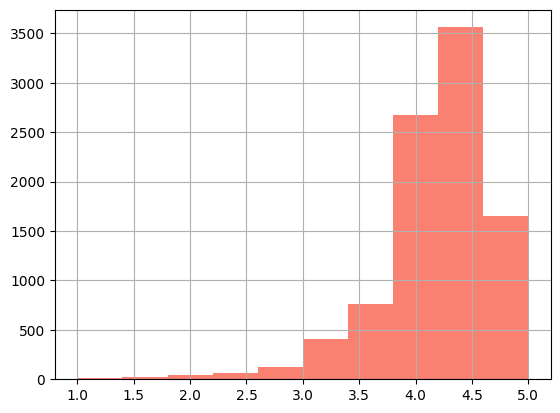

In [ ]:
op2['Rating'].hist(color = 'salmon')

#Converting a continuous feature (Rating) into a discrete or categorical variable.
The 'Rating' column have continuous values and from the plot, does not have a normal distribution. this has the tendency of negatively affecting the model's performance when built.

the idea is to convert it into discrete values making the feature easier to create an algorithm with, specifically tree-based models or classification tasks.

As observed from above, the frequency of some ratings value is disproportionately high, which means the data is distorted.

To resolve this challenge, the 'Rating' column has to undergo descretization meaning the 'Rating' feature will be transformed from a continuous variable into a descrete feature. this is done by grouping the 'Rating' values into 5 categories where each is represented by numerical values ranging from 1 to 5 allowing the model to work only only 5 categories.

This will be achieved by creating a function


In [ ]:
# function to convert from from continuous to descrete
def convert(x):
  if x > 0.0 and x <= 1.5:
       return 1
  elif x > 1.5 and x <= 2.5:
      return 2
  elif x > 2.5 and x <= 3.5:
      return 3
  elif x > 3.5 and x <= 4.5:
      return 4
  else:
      return 5

In [ ]:
op2['Rating']=op2['Rating'].apply(convert)

In [ ]:
op2.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver,year_added,month_added
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4,5.075174,19.0,10000,Free,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,2018,1
1,Coloring book moana,ART_AND_DESIGN,4,6.875232,14.0,500000,Free,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,5,11.379520,8.7,100000,Free,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,2018,8


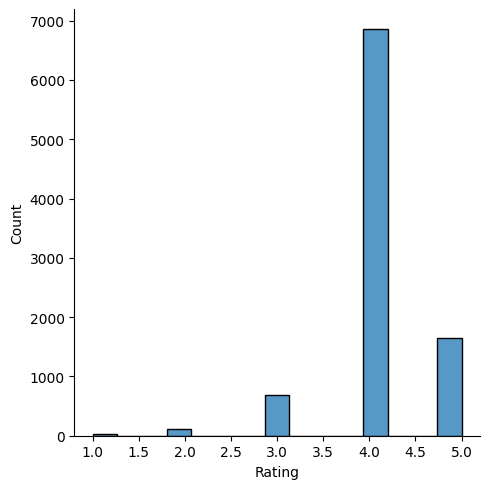

In [ ]:
sns.displot(op2['Rating'])

# Feature Encoding

In [ ]:
copy2=op2.copy()

In [ ]:
copy2.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'year_added', 'month_added'],
      dtype='object')

In [ ]:
# Mean encoding on 'Category'
mean_ordinal=copy2.groupby('Category')['Rating'].mean().to_dict()

In [ ]:
copy2['Category']=copy2['Category'].map(mean_ordinal)

In [ ]:
copy2['Category']

,Category
0,4.307692
1,4.307692
2,4.307692
3,4.307692
4,4.307692
...,...
9315,4.076294
9316,4.176471
9317,4.139752
9318,4.076294


In [ ]:
copy2.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver,year_added,month_added
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.307692,4,5.075174,19.0,10000,Free,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,2018,1
1,Coloring book moana,4.307692,4,6.875232,14.0,500000,Free,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.307692,5,11.379520,8.7,100000,Free,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,2018,8
3,Sketch - Draw & Paint,4.307692,4,12.281389,25.0,100000,Free,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,2018,6
4,Pixel Draw - Number Art Coloring Book,4.307692,4,6.875232,2.8,100000,Free,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,2018,6


In [ ]:
# Target mean encoding on 'Content Rating'
copy2['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [ ]:
ordinal_labels=copy2.groupby('Content Rating')['Rating'].mean().sort_values().index

In [ ]:
ordinal_labels

Index(['Unrated', 'Mature 17+', 'Everyone', 'Everyone 10+', 'Teen',
       'Adults only 18+'],
      dtype='object', name='Content Rating')

In [ ]:
enumerate(ordinal_labels,0)

In [ ]:
dict_store = {key:value for value, key in enumerate(ordinal_labels,0)}

In [ ]:
dict_store

{'Unrated': 0,
 'Mature 17+': 1,
 'Everyone': 2,
 'Everyone 10+': 3,
 'Teen': 4,
 'Adults only 18+': 5}

# Len method

In [ ]:
#for i in range(len(ordinal_labels)):
#   print(ordinal_labels[i])


#dict_st={}
#for i in range(len(ordinal_labels)):
#    dict_st[ordinal_labels[i]]=i

In [ ]:
copy2['Content Rating']=copy2['Content Rating'].map(dict_store)

In [ ]:
copy2.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver,year_added,month_added
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.307692,4,5.075174,19.0,10000,Free,2,Art & Design,2018-01-07,1.0.0,4.0.3 and up,2018,1
1,Coloring book moana,4.307692,4,6.875232,14.0,500000,Free,2,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.307692,5,11.379520,8.7,100000,Free,2,Art & Design,2018-08-01,1.2.4,4.0.3 and up,2018,8
3,Sketch - Draw & Paint,4.307692,4,12.281389,25.0,100000,Free,4,Art & Design,2018-06-08,Varies with device,4.2 and up,2018,6
4,Pixel Draw - Number Art Coloring Book,4.307692,4,6.875232,2.8,100000,Free,2,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,2018,6


Next is to encode the type feature and other important features and then drop the rast of the columns that are not important to the model being developed

In [ ]:
# import label encoder
from sklearn.preprocessing import LabelEncoder

# Initialize the encoder
encoder = LabelEncoder()

copy2['Type'] = encoder.fit_transform(copy2['Type'])

copy2.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver,year_added,month_added
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.307692,4,5.075174,19.0,10000,0,2,Art & Design,2018-01-07,1.0.0,4.0.3 and up,2018,1
1,Coloring book moana,4.307692,4,6.875232,14.0,500000,0,2,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,1


In [ ]:
# To drop unnecessary labels
copy2.drop(labels = ['App', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver'], axis = 1, inplace = True)

In [ ]:
copy2.head()

,Category,Rating,Reviews,Size,Installs,Type,Content Rating,year_added,month_added
0,4.307692,4,5.075174,19.0,10000,0,2,2018,1
1,4.307692,4,6.875232,14.0,500000,0,2,2018,1
2,4.307692,5,11.379520,8.7,100000,0,2,2018,8
3,4.307692,4,12.281389,25.0,100000,0,4,2018,6
4,4.307692,4,6.875232,2.8,100000,0,2,2018,6


In [ ]:
# Droping any one left out
copy2.dropna(inplace=True)

In [ ]:
copy3 = copy2.copy()
copy3.tail()

,Category,Rating,Reviews,Size,Installs,Type,Content Rating,year_added,month_added
9315,4.076294,4,2.890372,0.15,100,1,1,2015,11
9316,4.176471,4,3.583519,2.40,1000,1,2,2018,8
9317,4.139752,4,5.533389,11.00,10000,1,4,2015,2
9318,4.076294,4,7.248504,9.50,10000,1,2,2018,6
9319,4.076294,4,0.000000,1.00,50,1,2,2012,2


#Split copy3 into x and y data
x = dependent variable (Target),
y = independent variable (categorical features)

In [ ]:
x = copy3.drop('Rating', axis = 1)
y = copy3['Rating']

In [ ]:
x

,Category,Reviews,Size,Installs,Type,Content Rating,year_added,month_added
0,4.307692,5.075174,19.00,10000,0,2,2018,1
1,4.307692,6.875232,14.00,500000,0,2,2018,1
2,4.307692,11.379520,8.70,100000,0,2,2018,8
3,4.307692,12.281389,25.00,100000,0,4,2018,6
4,4.307692,6.875232,2.80,100000,0,2,2018,6
...,...,...,...,...,...,...,...,...
9315,4.076294,2.890372,0.15,100,1,1,2015,11
9316,4.176471,3.583519,2.40,1000,1,2,2018,8
9317,4.139752,5.533389,11.00,10000,1,4,2015,2
9318,4.076294,7.248504,9.50,10000,1,2,2018,6


In [ ]:
y

,Rating
0,4
1,4
2,5
3,4
4,4
...,...
9315,4
9316,4
9317,4
9318,4


In [ ]:
from sklearn.model_selection import train_test_split
# set random seed
np.random.seed(42)

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
len(x_train), len(x_test)

(7455, 1864)

In [ ]:
len(copy3)

9319

In [ ]:
x_train

,Category,Reviews,Size,Installs,Type,Content Rating,year_added,month_added
2183,4.128514,11.467101,15.0,100000,0,4,2018,8
6252,4.076294,2.833213,7.8,100,0,2,2018,7
7834,4.076294,11.168800,31.0,1000000,0,2,2018,8
3337,3.989446,14.172513,13.0,100000,0,2,2018,7
6481,4.094293,11.308395,13.0,1000000,0,2,2018,3
...,...,...,...,...,...,...,...,...
5734,4.080597,3.367296,7.3,1000,0,2,2018,6
5191,4.139752,5.105945,33.0,10000,0,4,2013,9
5390,4.075000,1.386294,19.0,100,0,2,2017,8
860,4.022059,12.571240,21.0,100000,0,4,2018,7


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Make predictions
x_pred = model.predict(x_test)
x_pred

array([4, 4, 4, ..., 4, 4, 4])

In [ ]:
# check accuracy on training data
model.score(x_train, y_train)

0.7348088531187122

In [ ]:
# check on test data
model.score(x_test, y_test)

0.7376609442060086

In [ ]:
# Trying out Ensemble's Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

rfclf_model = RandomForestClassifier()

rfclf_model.fit(x_train, y_train)

# Make predictions
y_pred = rfclf_model.predict(x_test)
y_pred

array([5, 4, 4, ..., 4, 4, 4])

In [ ]:
# Evaluating the model on training data
rfclf_model.score(x_train, y_train)

1.0

In [ ]:
# Evaluating on the test data
rfclf_model.score(x_test, y_test)

0.759656652360515

In [ ]:
rfclf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# Using accuracy metrics
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         7
           2       0.50      0.08      0.14        24
           3       0.43      0.08      0.13       133
           4       0.77      0.96      0.86      1375
           5       0.65      0.26      0.37       325

    accuracy                           0.76      1864
   macro avg       0.47      0.27      0.30      1864
weighted avg       0.72      0.76      0.71      1864



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

np.random.seed(42)

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Apply SMOTE to balance the classes in the training set
smote = SMOTE(random_state=42)
x_train_sm, y_train_sm = smote.fit_resample(x_train, y_train)

print(f"Original class distribution: {y_train.value_counts()}")
print(f"Resampled class distribution: {y_train_sm.value_counts()}")


Original class distribution: Rating
4    5478
5    1322
3     546
2      93
1      16
Name: count, dtype: int64
Resampled class distribution: Rating
4    5478
5    5478
3    5478
2    5478
1    5478
Name: count, dtype: int64


In [ ]:
# Define a RandomForestClassifier model
rfclf_model = RandomForestClassifier(random_state = 42)

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'class_weight': ['balanced', None]
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rfclf_model, param_grid=param_grid,
                           scoring='f1_weighted', cv=5, n_jobs=-1, verbose=2)

grid_search.fit(x_train_sm, y_train_sm)

# Best model after hyperparameter tuning
best_rf_model = grid_search.best_estimator_

# Output best parameters
print(f"Best hyperparameters: {grid_search.best_params_}")


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best hyperparameters: {'class_weight': None, 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
# Predict using the best model on the test set
y_pred = best_rf_model.predict(x_test)

# Classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         7
           2       0.07      0.12      0.09        24
           3       0.26      0.31      0.28       133
           4       0.81      0.78      0.80      1375
           5       0.45      0.45      0.45       325

    accuracy                           0.68      1864
   macro avg       0.32      0.33      0.32      1864
weighted avg       0.70      0.68      0.69      1864

Confusion Matrix:
[[   0    0    1    4    2]
 [   0    3    4   15    2]
 [   0    8   41   73   11]
 [   7   26  100 1078  164]
 [   2    6   11  160  146]]


In [ ]:
# Hyperparameter tuning with varied n_estimators
np.random.seed(42)

for i in range(5, 100, 5):
    print(f"Trying model with {i} estimators...")
    rf_model = RandomForestClassifier(n_estimators=i)
    rfclf_model.fit(x_train, y_train)
    print(f"Model accuracy on test set: {rfclf_model.score(x_test, y_test)}")
    print("")

Trying model with 5 estimators...
Model accuracy on test set: 0.759656652360515

Trying model with 10 estimators...
Model accuracy on test set: 0.7569742489270386

Trying model with 15 estimators...
Model accuracy on test set: 0.7585836909871244

Trying model with 20 estimators...
Model accuracy on test set: 0.7644849785407726

Trying model with 25 estimators...
Model accuracy on test set: 0.7628755364806867

Trying model with 30 estimators...
Model accuracy on test set: 0.7601931330472103

Trying model with 35 estimators...
Model accuracy on test set: 0.7623390557939914

Trying model with 40 estimators...
Model accuracy on test set: 0.759656652360515

Trying model with 45 estimators...
Model accuracy on test set: 0.7612660944206009

Trying model with 50 estimators...
Model accuracy on test set: 0.7628755364806867

Trying model with 55 estimators...
Model accuracy on test set: 0.7618025751072961

Trying model with 60 estimators...
Model accuracy on test set: 0.7655579399141631

Trying 

In [ ]:
#Saving the model
import pickle

pickle.dump(rfclf_model, open("playstore_review_ratings.pkl", "wb"))

In [ ]:
open_model = pickle.load(open("playstore_review_ratings.pkl", "rb"))

In [ ]:
open_model.score(x_test, y_test)

0.7634120171673819